In [25]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [26]:
# Importing Dataset

dataset = pd.read_excel(r"C:\Users\palak\Downloads\HousePricePrediction.xlsx")

In [27]:
print(dataset)

        Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0        0          60       RL     8450    Inside     1Fam            5   
1        1          20       RL     9600       FR2     1Fam            8   
2        2          60       RL    11250    Inside     1Fam            5   
3        3          70       RL     9550    Corner     1Fam            5   
4        4          60       RL    14260       FR2     1Fam            5   
...    ...         ...      ...      ...       ...      ...          ...   
2914  2914         160       RM     1936    Inside    Twnhs            7   
2915  2915         160       RM     1894    Inside   TwnhsE            5   
2916  2916          20       RL    20000    Inside     1Fam            7   
2917  2917          85       RL    10441    Inside     1Fam            5   
2918  2918          60       RL     9627    Inside     1Fam            5   

      YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0      

In [28]:
dataset.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [29]:
dataset.shape

(2919, 13)

In [30]:
# Data Preprocessing

obj = (dataset.dtypes == "object")
obj_cols = list(obj[obj].index)
print("Categorical variables:", len(obj_cols))

int_ = (dataset.dtypes == "int")
int_cols = list(int_[int_].index)
print("Integer variables:", len(int_cols))

float_ = (dataset.dtypes == "float")
float_cols = list(float_[float_].index)
print("Float variables:", len(float_cols))

Categorical variables: 4
Integer variables: 0
Float variables: 3


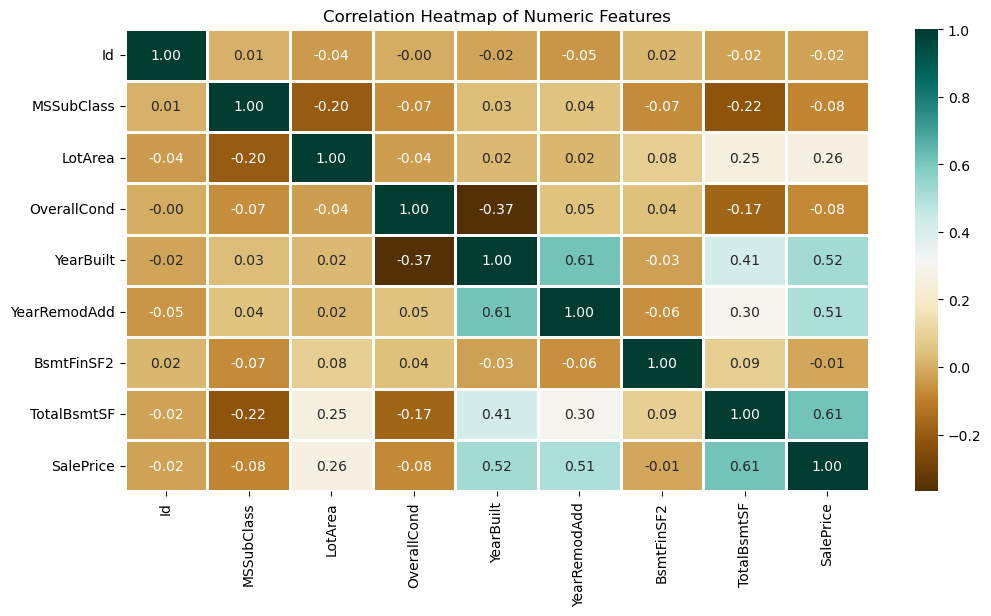

In [31]:
# EDA

num_dataset = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(num_dataset.corr(),
           cmap = 'BrBG',
           fmt = '.2f',
           linewidths = 2,
           annot = True)

plt.title('Correlation Heatmap of Numeric Features')
plt.show()

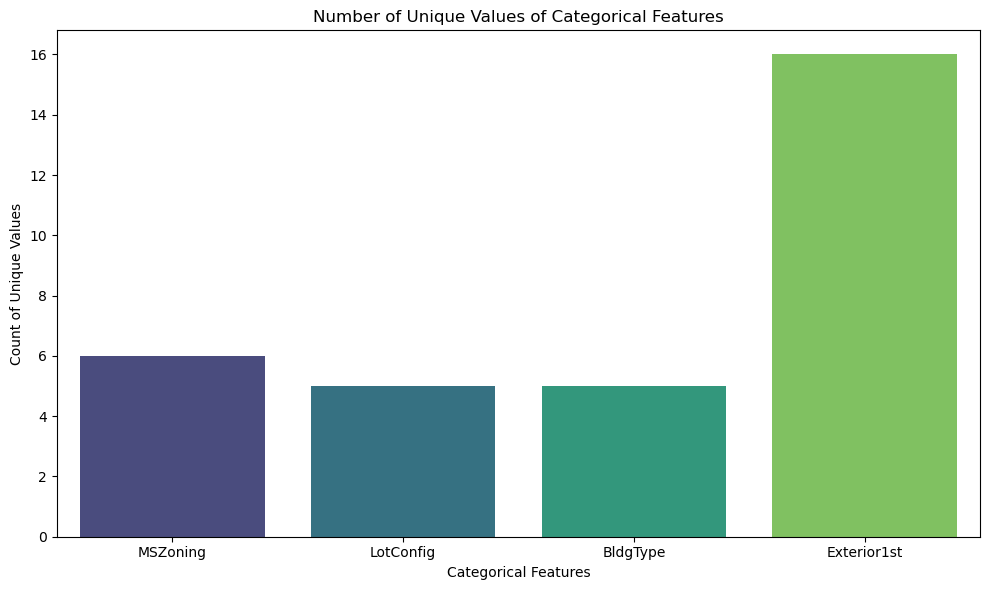

In [32]:
# Barplot

unique_values = []
for col in obj_cols:
    unique_values.append(dataset[col].unique().size)                  # dataset[col].nunique()  => faster than unique().size
     
plt.figure(figsize=(10,6))
plt.title('Number of Unique Values of Categorical Features')
#plt.xticks(rotation=90)                                             # for rotation of the x-axis label names by 90 degrees
sns.barplot(x=obj_cols, y=unique_values, palette ='viridis')
plt.ylabel('Count of Unique Values')
plt.xlabel('Categorical Features')
plt.tight_layout()
plt.show()                                                           # should be used, but works fine without this also

C:\Users\palak\AppData\Local\Temp\ipykernel_13224\1171375926.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


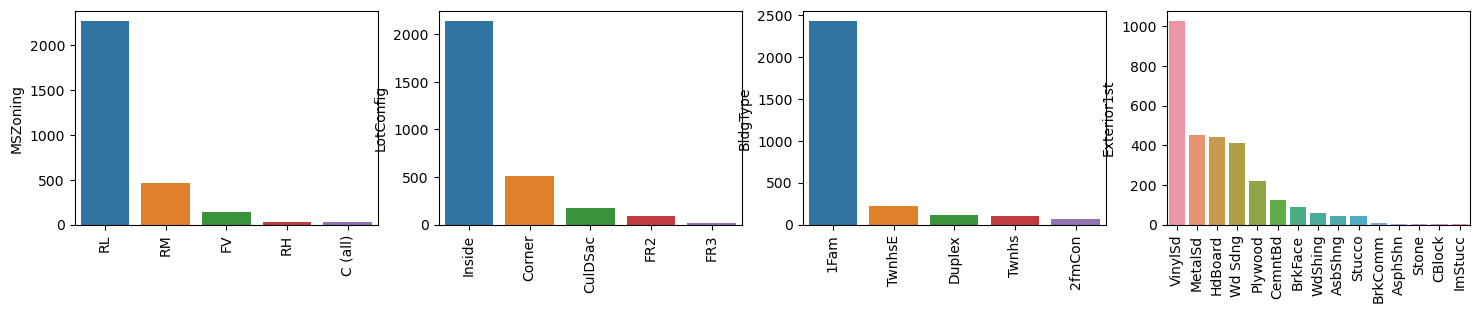

In [33]:
# Plotting Bar Graphs of each four features individually

plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in obj_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [34]:
# Data Cleaning

# Method 1. By dropping the irrelevant record/feature
if 'Id' in dataset.columns:
    dataset.drop(['Id'], axis=1, inplace=True)

# Method 2. Replacing Empty Values with their mean values to make the data distribution symmetric
if 'SalePrice' in dataset.columns:
    dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].median())     
    
# mean good for rough distribution, median good for skewed distribution

In [35]:
# dropping the records with null values in the new dataset

new_dataset = dataset.dropna()

# checking features which have null values in the new dataset

new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [36]:
# Label Categorical features :

from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print('Categorical variables:')
print(object_cols)
print('No. of. categorical features:',
     len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features: 4


In [37]:
# Applying OneHotEncoder :

OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [38]:
# Splitting Dataset : Training and Testing

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis = 1)
Y = df_final['SalePrice']

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [39]:
# Model Training and Accuracy

from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

# Applying Support Vector Machine Algorithm
model_SVR = svm.SVR()
model_SVR.fit(X_train, Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.16508335972525598


In [43]:
# Random Forest Regression Application 

from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)

0.17823556961772213

In [41]:
print(sklearn.__version__)

1.2.1


In [44]:
# Linear Regression

from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred - model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.17823556961772213
